# Quantification of the Feasible Muscle Force Space

## Introduction

In this notebook, we will demonstrate how to compute the feasible muscle forces
for an arbitrary movement. Task space projection will be used as an ID (Inverse
Dynamics) controller, in order to find the task forces ($f_t$) that achieve the
objective goal ($x_t$). These forces can consequently actuate the model in a FD
(Forward Dynamics) manner and the resultant movement can be assessed. Task space
projection is a natural choice for planning a movement, because the
characteristics of the movement are encoded in a straightforward
manner. Furthermore, we will evaluate the feasible muscle forces, the muscle
force variability and the possible correlations between different muscle groups.

## Task Space Projection

The task space position ($x_t$) is given as a function of the generalized
coordinates ($q$)


\begin{equation}\label{equ:task-position}
x_t = g(q), x_t \in \Re^{d}, q \in \Re^{n}, d \leq n
\end{equation}


The first and second derivatives with respect to time (the dot notation depicts
a derivative with respect to time) are given by


\begin{equation}\label{equ:task-joint-vel}
  \dot{x}_t = J_t(q) \dot{q}, \; J_t(q) =
  \begin{bmatrix}
  \frac{\partial g_1}{\partial q_1} & \cdots & \frac{\partial g_1}{\partial q_n} \\
      \vdots & \ddots & \vdots \\
      \frac{\partial g_d}{\partial q_1} & \cdots & \frac{\partial g_d}{\partial q_n}
  \end{bmatrix}
  \in \Re^{d\times n}
\end{equation}


\begin{equation}\label{equ:task-joint-acc}
  \ddot{x}_t = \dot{J}_t\dot{q} + J_t\ddot{q}
\end{equation}


The task Jacobian defines a dual relation between motion and force
quantities. The virtual work principle can be used to establish the link between
task and join space forces (augmented by the null space)


\begin{equation}\label{equ:joint-task-forces-vw}
  \begin{aligned}
    \tau^T \delta q &= f_t^T \delta x_t \\
    \tau^T \delta q &= f_t^T J_t \delta q \\
    \tau &= J_t^T f_t + N_{J_t} \tau_0, \; N_{J_t} = (I - J_t^T \bar{J}_t^T)
  \end{aligned}
\end{equation}


where $N_{J_t} \in \Re^{n \times n}$ represents the right null space of $J_t$
and $\bar{J}_t$ the generalized inverse. Let the joint space equations of motion
(EoMs) have the following form

 
\begin{equation}\label{equ:eom-joint-space}
  \begin{gathered}
    M(q) \ddot{q} + f(q, \dot{q}) =  \tau  \\
    f(q, \dot{q}) = \tau_g(q) + \tau_c(q, \dot{q}) + \tau_{o}(q, \dot{q}) 
  \end{gathered}
\end{equation}


where $M \in \Re^{n \times n}$ denotes the symmetric, positive definite joint
space inertia mass matrix, $n$ the number of DoFs of the model and ${q, \dot{q},
\ddot{q}} \in \Re^{n}$ the joint space generalized coordinates and their
derivatives with respect to time. The term $f \in \Re^{n}$ is the sum of all
joint space forces, $\tau_g \in \Re^{n}$ is the gravity, $\tau_c \in \Re^{n}$
the Coriolis and centrifugal and $\tau_{o} \in \Re^{n}$ other generalized
forces. Term $\tau \in \Re^{n}$ denotes a vector of applied generalized forces
that actuate the model.


We can project the joint space EoMs in the task space by multiplying both sides
from the left with $J_t M^{-1}$


\begin{equation}\label{equ:eom-task-space}
  \begin{gathered}
    J_t M^{-1}M \ddot{q} + J_t M^{-1}f = J_t M^{-1}\tau \\
    \ddot{x}_t - \dot{J}_t\dot{q} + J_t M^{-1}f = J_t M^{-1} (J^T_t f_t + N_{J_t} \tau_0) \\
    \Lambda_t(\ddot{x}_t + b_t) + \bar{J}_t^T f = f_t 
  \end{gathered}
\end{equation}


where $\Lambda_t=(J_tM^{-1}J_t^T)^{-1} \in \Re^{d \times d}$ represents the task
space inertia mass matrix, $b_t = - \dot{J}_t\dot{q}$ the task bias term and
$\bar{J}_t^T = \Lambda_m RM^{-1} \in \Re^{d \times n}$ the generalized inverse
transpose of $J_t$ that is used to project joint space quantities in the task
space. Note that $\bar{J}_t^T N_{J_t} \tau_0 = 0$.

## Quantification of the Feasible Muscle Force Space

The planning will be performed in task space in combination with a Proportional
Derivative (PD) tracking scheme

\begin{equation}\label{equ:pd-controller}
  \ddot{x}_t = \ddot{x}_d + k_p (x_d - x_t) + k_d (\dot{x}_d - x_t)
\end{equation}

where $x_d, \dot{x}_d, \ddot{x}_d$ are the desired position, velocity and
acceleration of the task and $k_p = 50, k_d = 5$ the tracking gains.

The desired task goal is derived from a smooth sigmoid function that produces
bell-shaped velocity profiles in any direction around the initial position of
the end effector


\begin{equation}\label{equ:sigmoid}
  \begin{gathered}
    x_d(t) = [x_{t,0}(0) + a (tanh(b (t - t_0 - 1)) + 1) / 2, x_{t,1}(0)]^T, \; 
    \dot{x}_d(t) = \frac{d x_d(t)}{dt}, \; \ddot{x}_d(t) = \frac{d \dot{x}_d(t)}{dt} \\
    x_d^{'} = H_z(\gamma) x_d, \; \dot{x}_d^{'} = H_z(\gamma) \dot{x}_d, \; \ddot{x}_d^{'} = H_z(\gamma) \ddot{x}_d 
  \end{gathered}
\end{equation}

where $x_{t, 0}$, $x_{t, 1}$ represent the $2D$ components of $x_t$, $a = 0.3$,
$b = 4$ and $t_0 = 0$. Different directions of movement are achieved by
transforming the goals with $H_z(\gamma)$, which defines a rotating around
the $z$-axis of an angle $\gamma$.

For a linear muscle model ($a_m$ stands for muscle activations), the following
inequality defines the feasible null space solutions ($f_{m0}$)

\begin{equation}\label{equ:linear-muscle-null-space-inequality}
  \begin{gathered}
    f_m = f_{max} \circ a_m = f_m^{\parallel} + N_{R} f_{m0}, \; 0 \preceq a_m \preceq 1
    \rightarrow \\
    \begin{bmatrix}
      -N_{R} \\  
      \hdashline
      N_{R}
    \end{bmatrix}
    f_{m0} \preceq
    \begin{bmatrix}
      f_m^{\parallel} \\
      \hdashline
      f_{max} - f_m^{\parallel}
    \end{bmatrix}
  \end{gathered}
\end{equation}

in terms of the moment arm null space $N_{R}$, the maximum muscle force
$f_{max}$ and the "action" $f_m^{\parallel}$. The $\circ$ notation is
the Hadamard (elementwise) product. The feasible muscle force set is
given by

\begin{equation}\label{equ:feasible-muscle-force-set}
  f_m^{\oplus} = \{f_m^{\parallel} + f_{m,i}^{\perp},\; f_{m,i}^{\perp} = N_{R} f_{m0, i},\; \forall i\}
\end{equation}

  
Note that the muscle forces $f_m$ can be expressed as the sum of two mutually
orthogonal subspaces that span the entire muscle space ($f_m = f_m^{\parallel} +
f_m^{\perp} \in \Re^{m}$). This kind of analysis is independent of the ID
controller.  A solution of muscle forces $f_{m}^{\parallel}$ in the task, joint
or muscle space respectively can be obtained as follows:


\begin{equation}\label{equ:particular-muscle-force}
  \begin{gathered}
    f_m^{\parallel} = -R^{+T} J^T_t (\Lambda_t(\ddot{x}_t + b_t) + \bar{J}_t^T f) \\
    f_m^{\parallel} = -R^{+T} (M \ddot{q} + f)  \\
    f_m^{\parallel} = -\Lambda_m(\ddot{l}_{mt} + b_m) - R^{+T} f
  \end{gathered}
\end{equation}

In [1]:
# notebook general configuration

%load_ext autoreload
%autoreload 2

# imports and utilities
import numpy as np
import sympy as sp
from IPython.display import display, Image
sp.interactive.printing.init_printing()

import logging
logging.basicConfig(level=logging.INFO)

# plot
%matplotlib inline
from matplotlib.pyplot import *
rcParams['figure.figsize'] = (10.0, 6.0)

# utility for displaying intermediate results
enable_display  = True
def disp(*statement):
    if (enable_display):
        display(*statement)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# import necessary modules
from model import ArmModel
from projection import TaskSpace
from controller import TaskSpaceController
from simulation import Simulation
from analysis import FeasibleMuscleSetAnalysis
from util import calculate_feasible_muscle_set

In [3]:
# construct model gravity disabled to improve execution time during numerical
# integration note that if enabled, different PD gains are required to track the
# movement accurately
model = ArmModel(use_gravity=0, use_coordinate_limits=1, use_viscosity=1)
model.pre_substitute_parameters()

'x_t = '

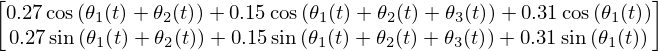

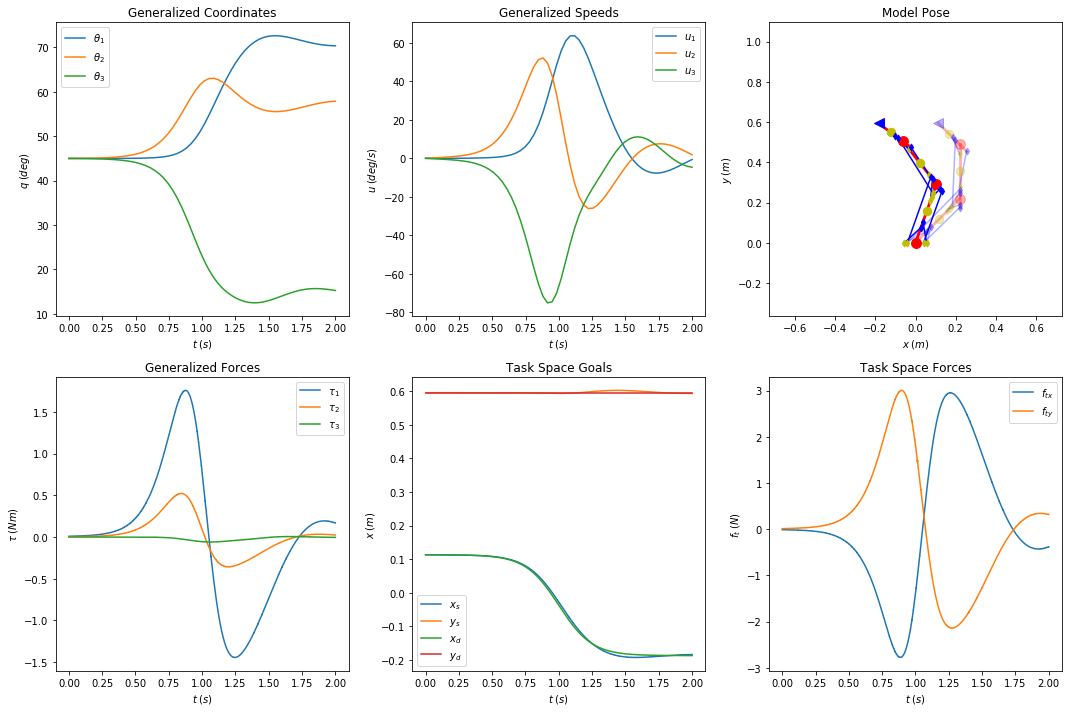

In [4]:
# simulation parameters
t_end = 2.0
angle = np.pi  # direction of movement
base_dir = 'results/feasible_muscle_forces/'
format_ext = 'pdf'

# define the end effector position in terms of q's
end_effector = sp.Matrix(model.ee)
disp('x_t = ', end_effector)

# task space controller
task = TaskSpace(model, end_effector)
controller = TaskSpaceController(model, task, angle=angle)

# numerical integration
simulation = Simulation(model, controller)
simulation.integrate(t_end)

# plot simulation results
fig, ax = subplots(2, 3, figsize=(15, 10))
simulation.plot_simulation(ax[0])
controller.reporter.plot_task_space_data(ax[1])
fig.tight_layout()
fig.savefig(base_dir + 'task_space.' + format_ext, format=format_ext, dpi=300)

  0%|          | 0/11 [00:00<?, ?it/s]

Calculating feasible muscle set ...


100%|██████████| 11/11 [00:20<00:00,  1.82s/it]


convert -delay 100.0 -loop 0 results/feasible_muscle_forces/feasible_forces_ts180_*.png results/feasible_muscle_forces/feasible_forces_ts180_anim.gif


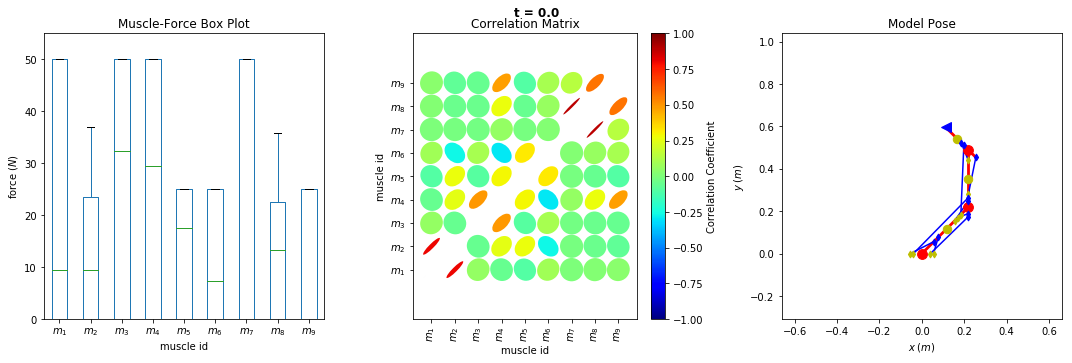

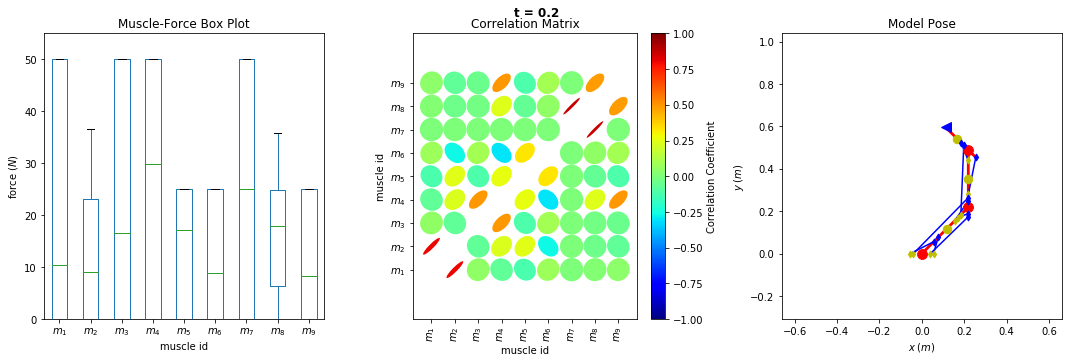

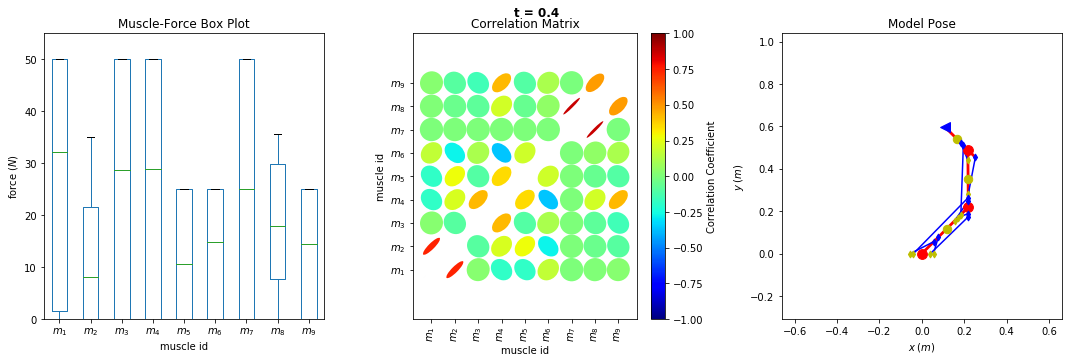

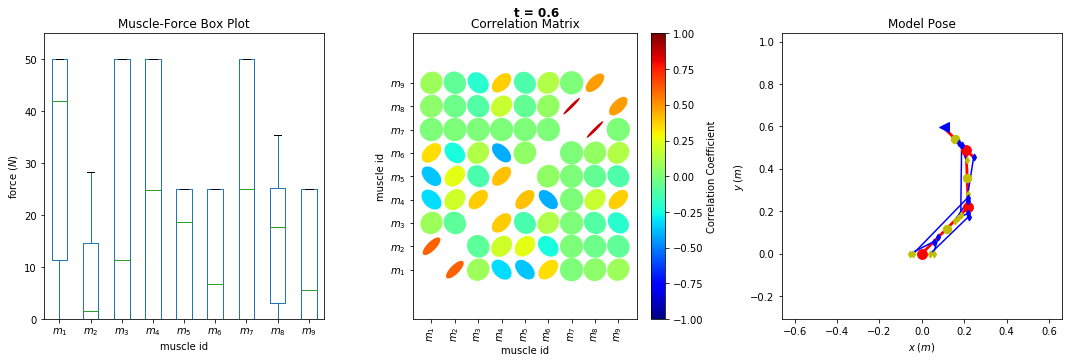

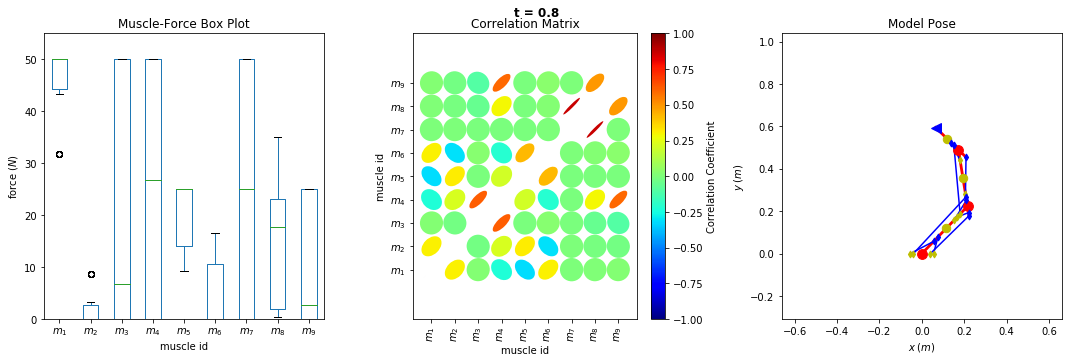

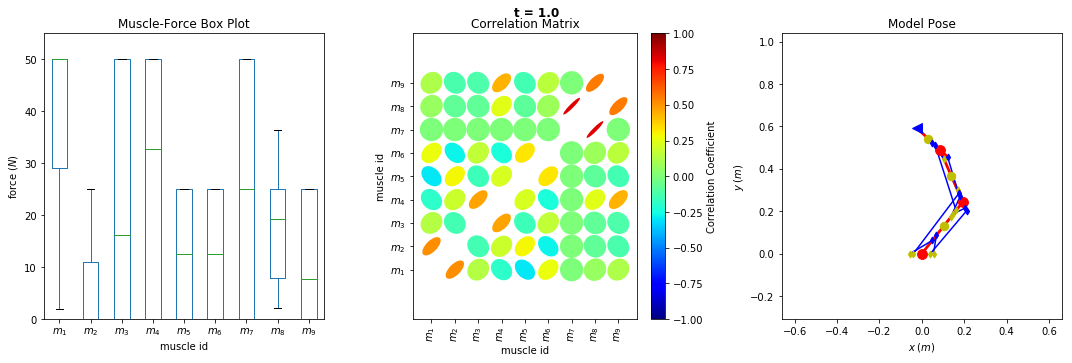

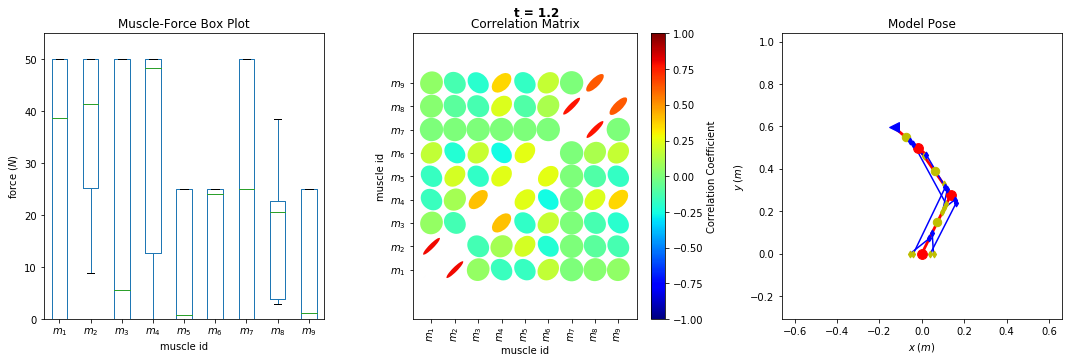

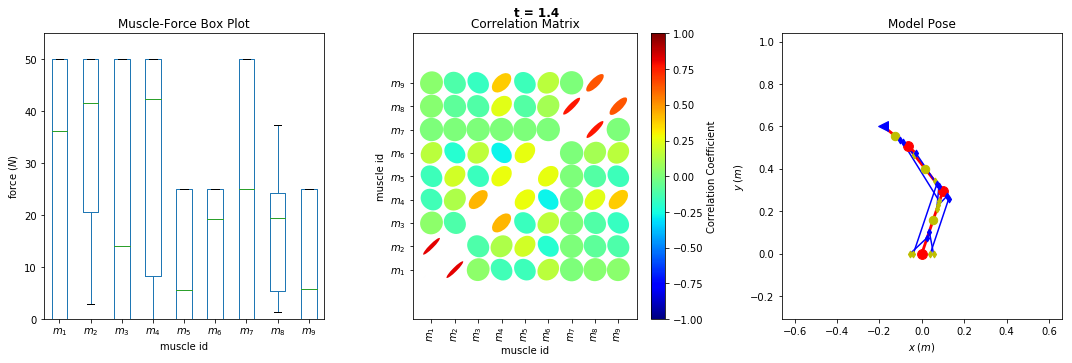

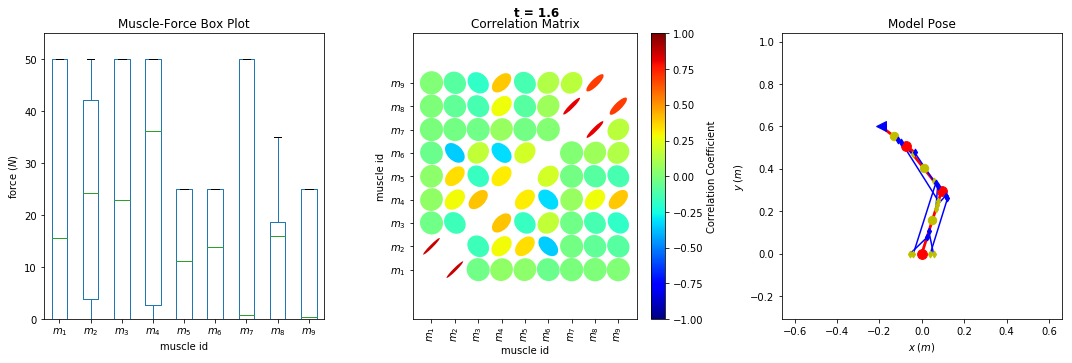

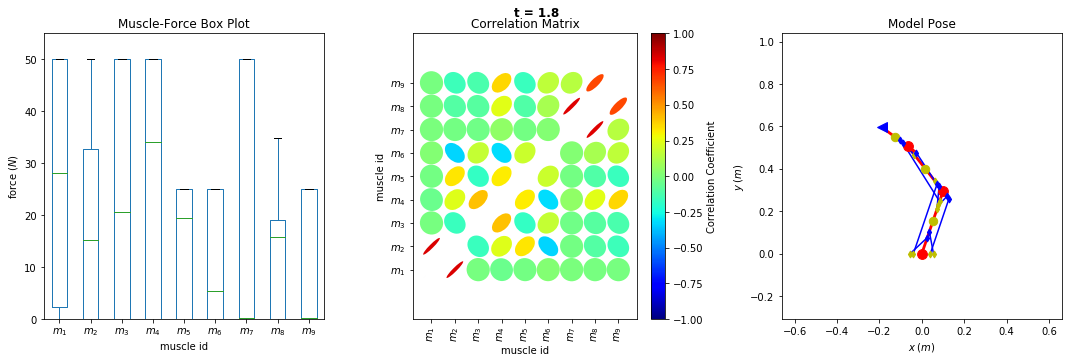

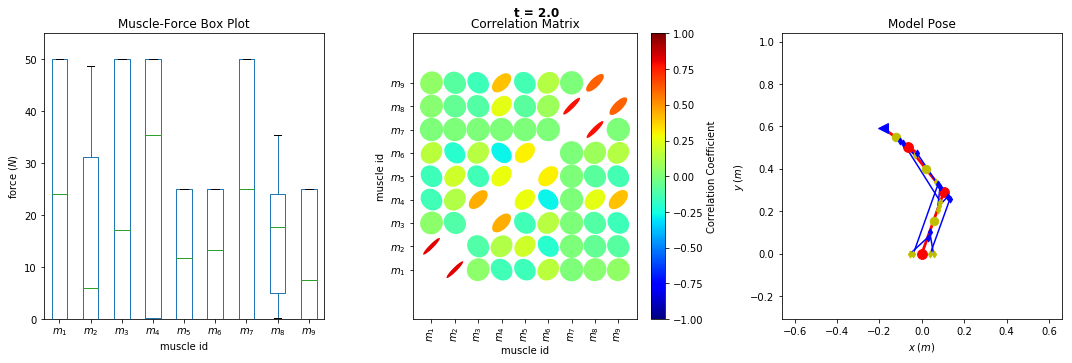

In [5]:
dt = 0.2
feasible_muscle_set = FeasibleMuscleSetAnalysis(model, controller.reporter)
base_name = base_dir + 'feasible_forces_ts' + str(int(np.rad2deg(angle))) + '_'
calculate_feasible_muscle_set(feasible_muscle_set, base_name, 0.0, t_end, dt, 500)

In [6]:
Image(url=base_name + 'anim.gif')